<a href="https://colab.research.google.com/github/anushk218/codsoft/blob/main/task_1_Titanic_(codsoft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Name,0
Sex,0
Age,177
SibSp,0
Ticket,0
Fare,0


In [ ]:
# data["Survived"].fillna(data["Survived"].mean(),inplace=True)

In [ ]:
data["Survived"].isnull().sum()

np.int64(0)

In [ ]:
Age_data=data[["Survived","Age","Fare"]].copy()

In [ ]:
with_null=Age_data.loc[Age_data["Age"].isnull()].copy()
without_null=Age_data.loc[Age_data["Age"].notna()].copy()

In [ ]:
with_null.describe()

,Survived,Age,Fare
count,177.000000,0.0,177.000000
mean,0.293785,NaN,22.158567
std,0.456787,NaN,31.874608
min,0.000000,NaN,0.000000
25%,0.000000,NaN,7.750000
50%,0.000000,NaN,8.050000
75%,1.000000,NaN,24.150000
max,1.000000,NaN,227.525000


In [ ]:
without_null.describe()

,Survived,Age,Fare
count,714.000000,714.000000,714.000000
mean,0.406162,29.699118,34.694514
std,0.491460,14.526497,52.918930
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,8.050000
50%,0.000000,28.000000,15.741700
75%,1.000000,38.000000,33.375000
max,1.000000,80.000000,512.329200


In [ ]:
age_prediction=LinearRegression()
age_prediction.fit(without_null.drop("Age",axis=1),without_null["Age"])

LinearRegression()

In [ ]:
result_age_prediction=age_prediction.predict(with_null.drop("Age",axis=1))
result_age_prediction

array([30.12510206, 27.00204533, 26.80257682, 30.08250387, 26.82517289,
       30.10567331, 31.61385383, 26.82071032, 26.80272189, 30.10567331,
       30.11099937, 30.36832238, 26.82071032, 30.58175195, 27.77919534,
       30.79042882, 27.07961526, 30.10567331, 30.11099937, 26.82200557,
       30.11099937, 30.11099937, 30.10567331, 26.82157382, 27.38716633,
       30.11099937, 30.10063737, 27.32528101, 30.35954231, 30.08552612,
       30.13215512, 32.23520941, 28.45272535, 30.72840188, 30.7125722 ,
       32.23520941, 30.35277938, 31.5599524 , 27.08839533, 30.10063737,
       26.82071032, 32.23520941, 30.10063737, 30.10567331, 30.7125722 ,
       30.09372937, 30.33220045, 27.08839533, 30.08336737, 29.28859336,
       30.10063737, 30.10063737, 30.90369239, 26.82071032, 29.83295237,
       30.73099238, 30.79042882, 27.60649534, 26.82071032, 27.35608033,
       26.97959433, 30.11099937, 30.38293456, 32.23520941, 27.35608033,
       31.16929639, 30.10567331, 27.10911933, 31.04185239, 30.08

In [ ]:
data.loc[data["Age"].isnull(),"Age"]=result_age_prediction

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
average_age_of_survived = data["Age"].mean()
print(average_age_of_survived)

29.686323832793516


In [ ]:
data["sex_encoded"] = data["Sex"].map({"male": 1, "female": 2})

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
data[["Sex","sex_encoded"]].head(10)

,Sex,sex_encoded
0,male,1
1,female,2
2,female,2
3,female,2
4,male,1
5,male,1
6,male,1
7,male,1
8,female,2
9,female,2


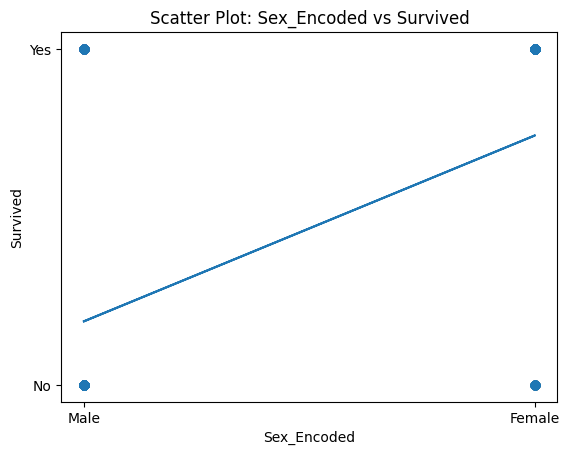

In [ ]:
plt.scatter(data["sex_encoded"], data["Survived"])
z = np.polyfit(data["sex_encoded"], data["Survived"],1)
p = np.poly1d(z)
plt.plot(data["sex_encoded"], p(data["sex_encoded"]))
plt.xlabel("Sex_Encoded")
plt.ylabel("Survived")

#plot title
plt.title("Scatter Plot: Sex_Encoded vs Survived")
plt.yticks([0,1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
plt.show()